### breast cancer data -- Classifier
supervised-learning-on-breast-cancer-dataset
1. looking at target value's type to decide what supervised learning method to use
2. classification VS regression

In [9]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


### SVM

In [23]:
# unnormalized data
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


In [24]:
#using LinearSVC function
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.92
Accuracy of Linear SVC classifier on test set: 0.94


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


In [17]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

this_C = 1.0 #default
clf = SVC(kernel = 'linear',C= this_C).fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.97
Accuracy of Linear SVC classifier on test set: 0.96


In [22]:
#loop the value of C, and try to find the best-performance model
for this_C in [0.00001, 0.0001,0.001,0.01,0.1,1,10,100]:
    clf = SVC(kernel = 'linear',C= this_C).fit(X_train, y_train)

    print('Breast cancer dataset with C = {}'.format(this_C))
    print('Accuracy of Linear SVC classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Linear SVC classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))

Breast cancer dataset with C = 1e-05
Accuracy of Linear SVC classifier on training set: 0.91
Accuracy of Linear SVC classifier on test set: 0.94
Breast cancer dataset with C = 0.0001
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.94
Breast cancer dataset with C = 0.001
Accuracy of Linear SVC classifier on training set: 0.95
Accuracy of Linear SVC classifier on test set: 0.93
Breast cancer dataset with C = 0.01
Accuracy of Linear SVC classifier on training set: 0.96
Accuracy of Linear SVC classifier on test set: 0.93
Breast cancer dataset with C = 0.1
Accuracy of Linear SVC classifier on training set: 0.97
Accuracy of Linear SVC classifier on test set: 0.93
Breast cancer dataset with C = 1
Accuracy of Linear SVC classifier on training set: 0.97
Accuracy of Linear SVC classifier on test set: 0.96
Breast cancer dataset with C = 10
Accuracy of Linear SVC classifier on training set: 0.98
Accuracy of Linear SVC classifier on test set:

In [38]:
# cross validation
# using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)

cv_scores = cross_val_score(clf, X_cancer, y_cancer)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [ 0.9         0.94736842  0.92063492]
Mean cross-validation score (3-fold): 0.923


In [41]:
# cross validation
# using KNN
# on scaled data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)

#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

cv_scores = cross_val_score(clf, X_cancer_scaled, y_cancer)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))


Cross-validation scores (3-fold): [ 0.94736842  0.96842105  0.95767196]
Mean cross-validation score (3-fold): 0.958


In [ ]:
# validation curve


In [43]:
param_range = np.logspace(-3,3,4)
param_range

array([  1.00000000e-03,   1.00000000e-01,   1.00000000e+01,
         1.00000000e+03])

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(SVC(), X_cancer, y_cancer,
                                            param_name='gamma',
                                            param_range=param_range, 
                                            cv=3)
print(train_scores)

[[ 0.9762533   0.97361478  0.98421053]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]]


In [48]:
print(test_scores)

[[ 0.91578947  0.93684211  0.91005291]
 [ 0.62631579  0.62631579  0.62962963]
 [ 0.62631579  0.62631579  0.62962963]
 [ 0.62631579  0.62631579  0.62962963]]


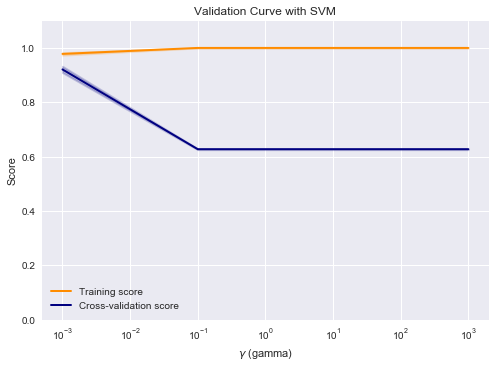

In [49]:
# this block of code was copied from resources on line
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [51]:
### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.92


In [71]:
# prevent overfitting
# pre-pruning
clf2 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 4,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of Decision Tree classifier on test set: 0.93


In [89]:
from sklearn import tree
from graphviz import graphviz
dot_data = tree.export_graphviz(clf,
                     out_file=None)
graph = graphviz.Source(dot_data) 
graph

ModuleNotFoundError: No module named 'graphviz'

In [84]:
# converting into the pdf file
with open("tree.dot", "w") as f:
    f = tree.export_graphviz(clf2, out_file=f)

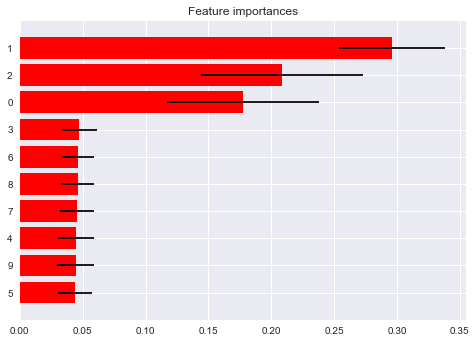